<a href="https://colab.research.google.com/github/Yuri-Vlasqz/Yuri-Vlasqz/blob/main/Imers%C3%A3o_de_dados_Alura_(2022).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **4º Imersão de dados Alura (2022)**
Autor: Yuri Velasquez

Aulas de 23 até 27 de maio


In [ ]:
# Importação de blibliotecas
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import time

# Parâmetros Globais
pd.set_option('display.float_format', lambda x: '%.2f' %x)
sns.set()

# Link dataset
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"

## Funções 

In [ ]:
def baixa_dataset(url):
    """
    Baixa o dataset em csv de uma url e cria um dataframe.

    Parametros
    ----------
    url: string
        Link do arquivo.csv do dataset.
        
    Retorna
    -------
    dados_df: dataframe
        Tabelas com dados baixados

    Exemplos
    --------
    dados = baixa_dataset(url)
    """

    start = time.time()

    # Criando dataframe
    dados_df = pd.read_csv(url)

    end = time.time()
    print(f"Tempo para baixar dados: {round((end - start), 2)} segundos\n")

    print(f'Dataset: {dados_df.shape[0]} Linhas X {dados_df.shape[1]} Colunas')
    display(dados_df.head(5))

    return dados_df

In [ ]:
imoveis_df = baixa_dataset(url)

Tempo para baixar dados: 0.08 segundos

Dataset: 10008 Linhas X 8 Colunas


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [ ]:
def col_para_float(dados, col):
    """
    Transforma uma coluna de um dataframe do tipo string em float.

    Parametros
    ----------
    dados: dataframe
        Tabela de dados.
    col: string
        Coluna tipo 'str' do dataset.
        
    Retorna
    -------
    dados_col_float: dataframe
        Tabelas com tipo da coluna transformada.

    Exemplos
    --------
    dados_col_float = col_para_float(dados, 'coluna')
    """

    # Transformando coluna "Valor" de string para float
    dados["Tipo_anuncio"] = dados[col].str.split(expand = True)[2]
    dados[col] = dados[col].str.split(expand = True)[1]
    dados[col] = dados[col].str.replace(".","",regex=True).astype(float)

    display(dados.head(5))

    return dados

In [ ]:
dados_col_float = col_para_float(imoveis_df, 'Valor')

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685000.00,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00,None


In [ ]:
def remover_outliers():
    return

In [ ]:
def corr_matrix(data, cmap='divergent'):
    """
    It reads a dataframe and show a Lower Triangle Correlation Matrix.

    Parameters
    ----------
    data: dataframe
        Tabela ou colunas da tabela a serem correlacionadas (tipo numerico)
    cmap: string 
        Representa o mapa de cores (default='divergent' or 'sequencial')
        
    Returns
    -------
    matriz: None
        Mostra a matriz de correlação na chamada da função
        
    Examples
    --------
    corr_matrix(data[lista_colunas], 'cmap')
    """    

    # Lower Triangle Correlation Matrix
    corr_df = data.corr()
    corr_shape = corr_df.shape
    tri_df = corr_df.where(np.tril(np.ones(corr_shape)).astype(bool))

    # Figure Ploting parameters
    if cmap == "sequential":
        cmap = "rocket"
    else:
        cmap = "coolwarm"

    plt.figure(figsize=(corr_shape))
    sns.heatmap(tri_df, linewidths=0.5, annot=True, cmap=cmap)
    plt.title('Correlation Matrix')
    plt.xticks(rotation=40, ha='right')

    return

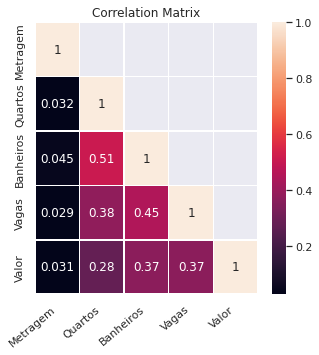

In [ ]:
corr_matrix(dados_col_float, 'sequential')

In [ ]:
# Removendo as linhas de imoveis do tipo aluguel (/dia, /mes, /ano)
imoveis_df = imoveis_df[imoveis_df["Tipo_anuncio"].isnull()]
imoveis_df = imoveis_df.drop(columns=['Tipo_anuncio'])
print('Dataset:',imoveis_df.shape[0],'Linhas X', imoveis_df.shape[1], 'Colunas')
imoveis_df.head()

Dataset: 9156 Linhas X 8 Colunas


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685000.00
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00


In [ ]:
# --- Bairro/Imóvel Outlier ---
display(imoveis_df[imoveis_df['Bairro'] == 'Vila Guaca'])
print('\n')
# Retirando Bairro Outlier (Vila Guaca)
imoveis_df = imoveis_df.drop(imoveis_df[imoveis_df['Bairro'] == 'Vila Guaca'].index)
imoveis_df[imoveis_df['Bairro'] == 'Vila Guaca']

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
9603,Rua Pestana,Vila Guaca,São Paulo,10,3,2,2,800000.00


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor


## **Desafios Aula 1**

1 - Realizar a média da metragem para cara um dos bairros (Paulo)

2 - 2 formas de selecionar os dados por bairro (consultar os métodos na documentação do pandas) (Thiago)

3 - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, tentar colocar alguma conclusão (Thiago)

4 - Pegar outros estatísticas dos dados, média, mediana, mim, max (Vivi)

5 - Descobrir quais são os bairros que não tem nome de Rua. (Vivi)





In [ ]:
# Desafio 1
medias = imoveis_df.groupby(['Bairro']).mean()['Metragem'].sort_values()
bairros = medias.index
med_metragem = medias.values
pd.DataFrame({'Bairros': bairros, 
              'Metragem média': med_metragem})

,Bairros,Metragem média
0,Vila Leonor,46.00
1,Jardim Benfica,48.00
2,Jardim Nova Germania,57.00
3,Cidade Antônio Estevão de Carvalho,57.50
4,Jardim São Jorge (Raposo Tavares),62.00
...,...,...
691,Chácara Flora,1251.44
692,Jardim das Camélias,1700.00
693,Jardim Guedala,2754.14
694,Vila Castelo,2850.00


In [ ]:
# Desafio 2 + curiosidade de saber qual mais rápido
bairro = 'Chácara Flora'

# forma 1
start = time.time()
display(imoveis_df[imoveis_df['Bairro'] == bairro])
end = time.time()
print(f"Tempo forma 1: {round((end - start), 3)} segundos\n")

# forma 2 (possivel selecionar mais de 1 bairro)
start = time.time()
display(imoveis_df[imoveis_df['Bairro'].isin([bairro])])
end = time.time()
print(f"Tempo forma 2: {round((end - start), 3)} segundos\n")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
328,"Rua dos Alcatrazes, 304",Chácara Flora,São Paulo,1300,5,8,9,10000000.00
1101,Rua Adamantina,Chácara Flora,São Paulo,771,4,4,6,8500000.00
1111,Rua Tombadouro,Chácara Flora,São Paulo,632,4,5,6,8000000.00
4314,Rua dos Alcatrazes,Chácara Flora,São Paulo,1300,6,6,9,10000000.00
4417,Rua dos Alcatrazes,Chácara Flora,São Paulo,1305,6,6,9,10000000.00
6512,Rua Utinga,Chácara Flora,São Paulo,1500,5,8,4,25000000.00
7191,Rua Utinga,Chácara Flora,São Paulo,1505,5,8,4,25000000.00
8907,Rua Junqueira,Chácara Flora,São Paulo,1650,3,5,6,15000000.00
9002,Rua dos Alcatrazes,Chácara Flora,São Paulo,1300,5,6,9,10000000.00


Tempo forma 1: 0.014 segundos



,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
328,"Rua dos Alcatrazes, 304",Chácara Flora,São Paulo,1300,5,8,9,10000000.00
1101,Rua Adamantina,Chácara Flora,São Paulo,771,4,4,6,8500000.00
1111,Rua Tombadouro,Chácara Flora,São Paulo,632,4,5,6,8000000.00
4314,Rua dos Alcatrazes,Chácara Flora,São Paulo,1300,6,6,9,10000000.00
4417,Rua dos Alcatrazes,Chácara Flora,São Paulo,1305,6,6,9,10000000.00
6512,Rua Utinga,Chácara Flora,São Paulo,1500,5,8,4,25000000.00
7191,Rua Utinga,Chácara Flora,São Paulo,1505,5,8,4,25000000.00
8907,Rua Junqueira,Chácara Flora,São Paulo,1650,3,5,6,15000000.00
9002,Rua dos Alcatrazes,Chácara Flora,São Paulo,1300,5,6,9,10000000.00


Tempo forma 2: 0.015 segundos



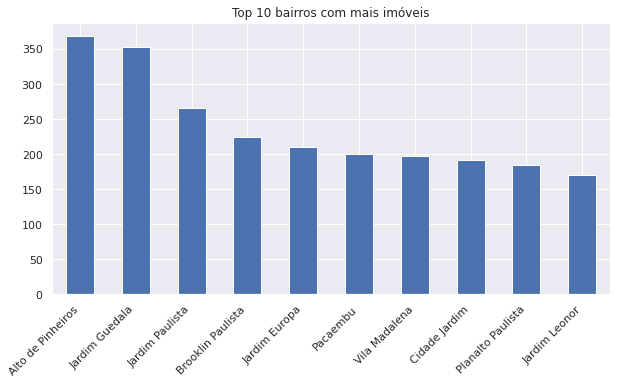

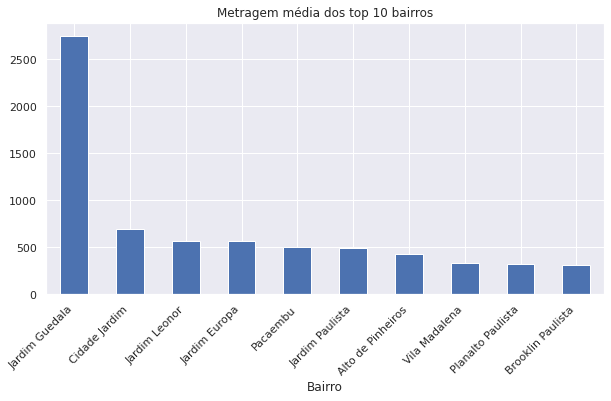

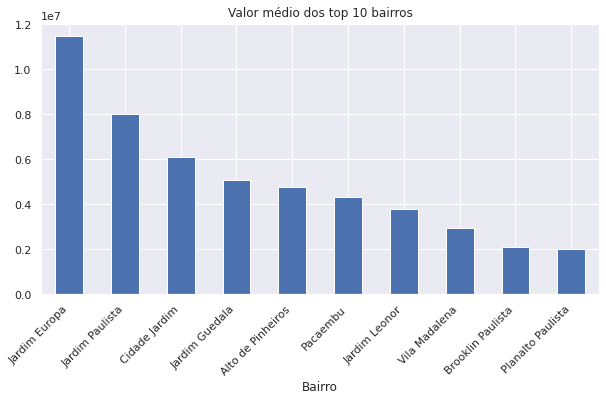

In [ ]:
# Desafio 3
# Top 10 bairros com mais imoveis
top10_bairros = imoveis_df['Bairro'].value_counts().head(10)
top10_df = imoveis_df[imoveis_df.Bairro.isin(top10_bairros.index)]

# Grafico top 10 bairros com mais imoveis
plt.figure(figsize=(10,5))
plt.title('Top 10 bairros com mais imóveis') 
top10_bairros.plot.bar()
plt.xticks(rotation=45, ha='right')
plt.show()

# Grafico das medias de metragem dos top 10 bairros
plt.figure(figsize=(10,5))
plt.title('Metragem média dos top 10 bairros')
top10_df.groupby('Bairro')['Metragem'].mean().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=45, ha='right')
plt.show()

# Grafico das medias de valor dos top 10 bairros
plt.figure(figsize=(10,5))
plt.title('Valor médio dos top 10 bairros')
top10_df.groupby('Bairro')['Valor'].mean().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=45, ha='right')
plt.show()

Entre os to 10 bairros com mais imoveis, Jardim Guedala se destaca na metragem média, Jardin Europa se destaca no valor medio

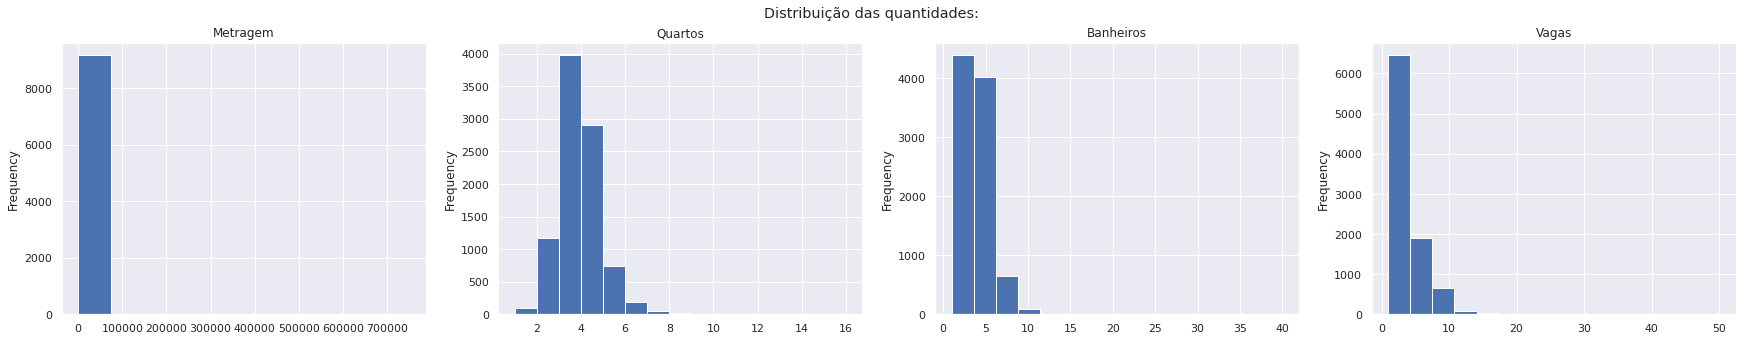

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(30,5))
plt.suptitle('Distribuição das quantidades:')
imoveis_df['Metragem'].plot.hist(ax=ax[0], bins=10, title='Metragem')
imoveis_df['Quartos'].plot.hist(ax=ax[1], bins=15, title='Quartos')
imoveis_df['Banheiros'].plot.hist(ax=ax[2], bins=15, title='Banheiros')
imoveis_df['Vagas'].plot.hist(ax=ax[3], bins=15, title='Vagas')
plt.show()

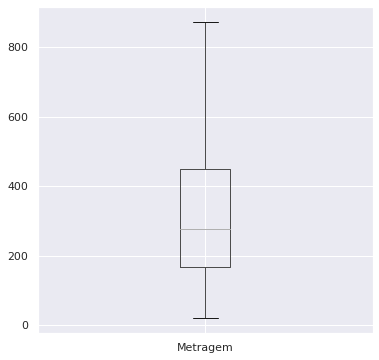

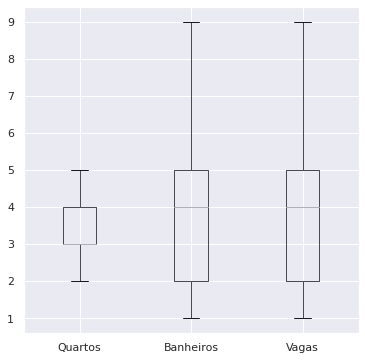

In [ ]:
# boxplot s/ ouliers
plt.figure(figsize=(6, 6))
boxplot_metragem = imoveis_df.boxplot('Metragem', showfliers=False)
colunas = ['Quartos','Banheiros','Vagas']
plt.figure(figsize=(6, 6))
boxplot_colunas = imoveis_df.boxplot(colunas, showfliers=False)

Através dos graficos acima (desconsiderando outliers para melhor visualização) é possível concluir:
- **Metragem**: A distribuição de dados é levemente assimétrica negativa, com a mediana em 290 se aproximando do primeiro quartil, se concentra entre os valores de 173 e 442.
- **Quartos**: A distribuição de dados é fortemente assimétrica negativa, com a mediana em 3, junto do primeiro quartil, se concentra entre os valores de 3 e 4.
- **Banheiros**: A distribuição de dados é assimétrica positiva, com a mediana em 4 se aproximando do terceiro quartil, se concentra entre os valores de 2 e 5.
- **Vagas**: A distribuição de dados é assimétrica positiva, com a mediana em 4 se aproximando do terceiro quartil, se concentra entre os valores de 2 e 5.

In [ ]:
# Desafio 4
display(imoveis_df[['Rua','Bairro','Cidade']].describe())
imoveis_df.describe()

,Rua,Bairro,Cidade
count,6106,9145,9155
unique,3005,696,1
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo
freq,24,369,9155


,Metragem,Quartos,Banheiros,Vagas,Valor
count,9155.00,9155.00,9155.00,9155.00,9155.00
mean,434.46,3.45,3.80,3.96,3052448.96
std,7856.85,1.05,1.97,2.60,3944353.37
min,20.00,1.00,1.00,1.00,13000.00
25%,168.00,3.00,2.00,2.00,890000.00
50%,276.00,3.00,4.00,4.00,1800000.00
75%,450.00,4.00,5.00,5.00,3500000.00
max,750000.00,16.00,40.00,50.00,65000000.00


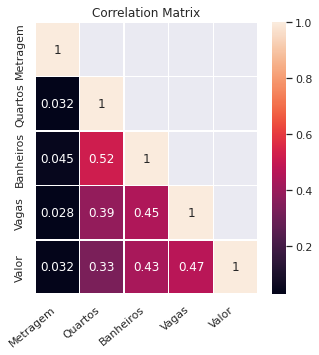

In [ ]:
colunas = ['Metragem', 'Quartos', 'Banheiros', 'Vagas', 'Valor']
# Matriz Correlação
corr_matrix(imoveis_df[colunas],'sequential')

In [ ]:
# Desafio 5
# Contagem de ruas nulas
ruas_nulas = imoveis_df[imoveis_df['Rua'].isnull()]['Bairro'].value_counts()

# Percentual de ruas nulas
ruas = imoveis_df['Bairro'].value_counts()
percent_ruas_nulas = []
for rua in ruas_nulas.index:
    percent = (ruas_nulas.loc[rua] / ruas.loc[rua]) * 100
    percent_ruas_nulas.append(percent)

# Tabela com estatistica das ruas nulas por bairro
pd.DataFrame({'Bairros': ruas_nulas.index, 
              'Contagem de ruas nulas': ruas_nulas.values, 
              'Percentual de nulas': percent_ruas_nulas})

,Bairros,Contagem de ruas nulas,Percentual de nulas
0,Jardim Guedala,156,44.19
1,Alto de Pinheiros,151,40.92
2,Jardim Paulista,126,47.37
3,Jardim Europa,107,50.95
4,Jardim Leonor,107,62.94
...,...,...,...
388,Jardim Monte Alegre,1,100.00
389,Vila Aparecida,1,100.00
390,Jardim Ponte Rasa,1,100.00
391,Jardim Marília,1,100.00


## **Desafios Aula 2**

- Criar uma escala de valores em milhões
- Deixar o gráfico do histograma de valores legível (alterar labels, cores, título, escala)
- Preço do metro quadrado por bairro e plotar em um gráfico ideal
- Explorar as bibliotecas de visualizações e colocar as suas conclusão
- Pesquisar um visualização para analisar os quartis, mediana e outliers

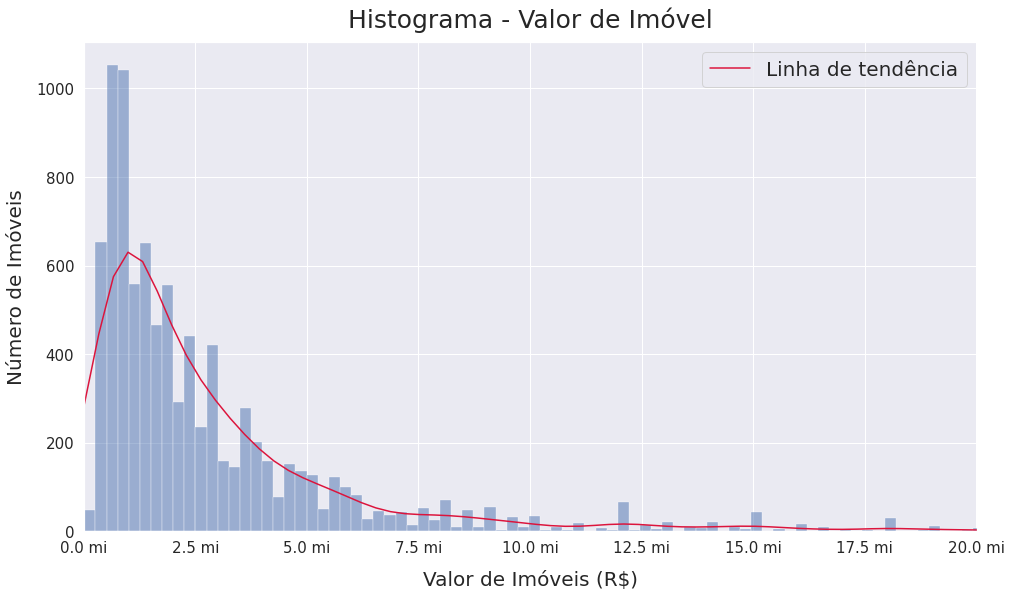

In [ ]:
# Criar uma escala de valores em milhões +
# Deixar o gráfico do histograma de valores legível

plt.figure(figsize=(16, 9))

# histograma + kde
ax = sns.histplot(data = imoveis_df['Valor'], kde=True)
ax.lines[0].set_color('crimson')

# Labels
plt.legend(['Linha de tendência'], prop={'size': 20})
ax.set_title('Histograma - Valor de Imóvel', fontsize=25, pad=15)
ax.set_ylabel('Número de Imóveis', fontsize=20, labelpad=10)
ax.set_xlabel('Valor de Imóveis (R$)', fontsize=20, labelpad=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Somente remove notacao cientifica (numeros puros)
#plt.ticklabel_format(axis="x", style="plain")

# Escala em Milhoes em R$
plt.xlim(0, 20000000)
# ax.set_xticks(np.arange(0, 20000001, 2000000)) # espacamento entre ticks
x_labels = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:.1f} mi'.format(x/1000000) for x in x_labels])

# Mostrando Graficos
plt.show()

In [ ]:
# Preço do metro quadrado por bairro e plotar em um gráfico ideal

# Criando coluna de preço por metro quadrado
imoveis_df.insert(loc=8, column='Preco/Metro',
                  value=( imoveis_df.Valor/imoveis_df.Metragem ))
imoveis_df.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Preco/Metro
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,7459.68
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,3040.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685000.00,2209.68
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00,5400.00


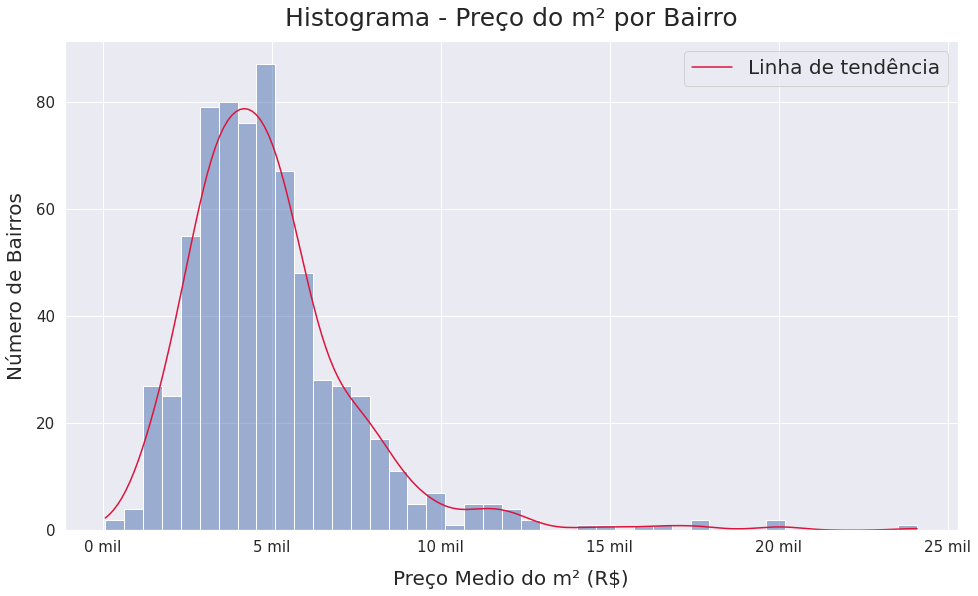

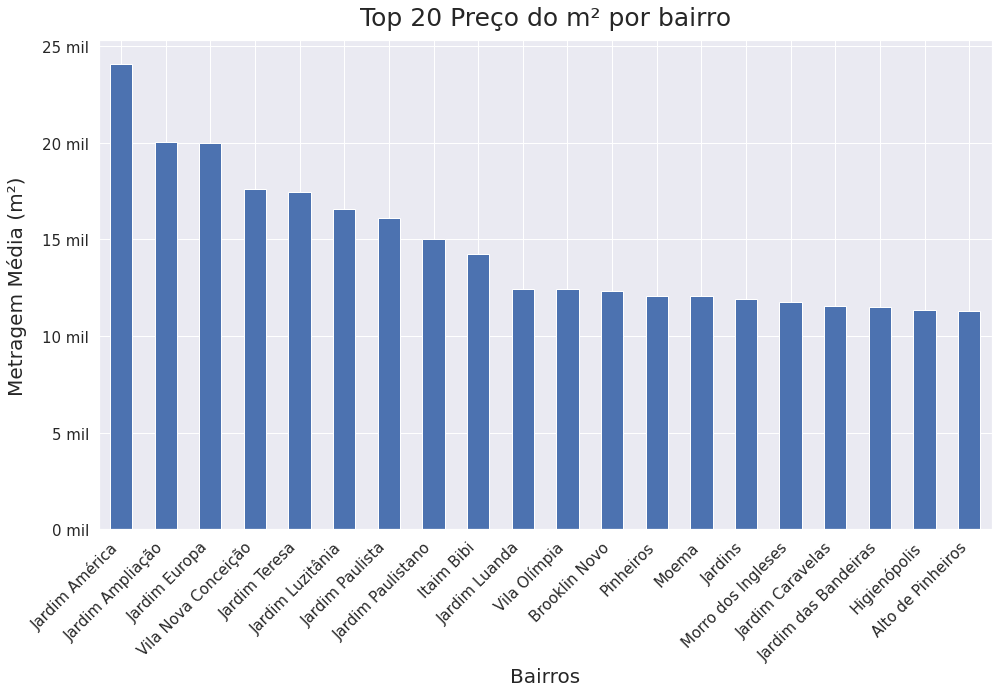

In [ ]:
# --- Lista ordenada por preço do metro quadrado por bairro ---
preco_m2_bairro = imoveis_df.groupby(['Bairro']).mean()['Preco/Metro'].sort_values(ascending=False) 


# --- Histograma preço do metro quadrado por bairro ---
plt.figure(figsize=(16, 9))

# histograma + kde
ax = sns.histplot(data = preco_m2_bairro, kde=True)
ax.lines[0].set_color('crimson')

# Labels
plt.legend(['Linha de tendência'], prop={'size': 20})
ax.set_title('Histograma - Preço do m² por Bairro', fontsize=25, pad=15)
ax.set_ylabel('Número de Bairros', fontsize=20, labelpad=10)
ax.set_xlabel('Preço Medio do m² (R$)', fontsize=20, labelpad=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Escala em Milhoes em R$
#plt.xlim(0, 20000000)
# ax.set_xticks(np.arange(0, 20000001, 2000000)) # espacamento entre ticks
x_labels = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:.0f} mil'.format(x/1000) for x in x_labels])

# Mostrando
plt.show()



# --- top bairros ---
top = 20
preco_m2_bairro = preco_m2_bairro[:top] 

# Grafico Barras
plt.figure(figsize=(16, 9))
ax = preco_m2_bairro.plot.bar()

# Labels
ax.set_title(f'Top {top} Preço do m² por bairro', fontsize=25, pad=15)
ax.set_ylabel('Metragem Média (m²)', fontsize=20, labelpad=15)
ax.set_xlabel('Bairros', fontsize=20)
plt.xticks(fontsize=15, rotation=45, ha='right')
plt.yticks(fontsize=15)

# Escala de milhar em m²
y_labels = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f} mil'.format(y/1000) for y in y_labels])

plt.show()

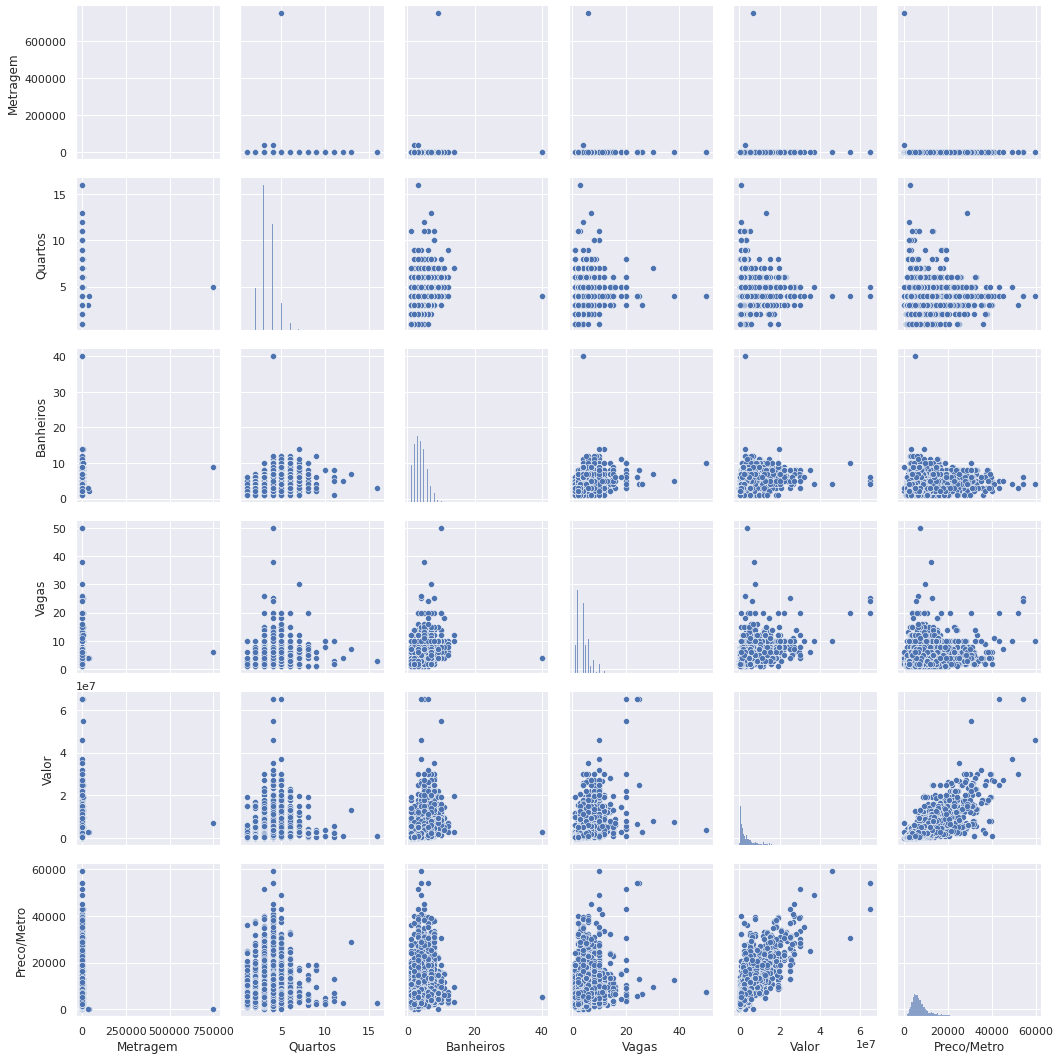

In [ ]:
# Explorar as bibliotecas de visualizações e colocar as suas conclusão
sns.pairplot(imoveis_df)

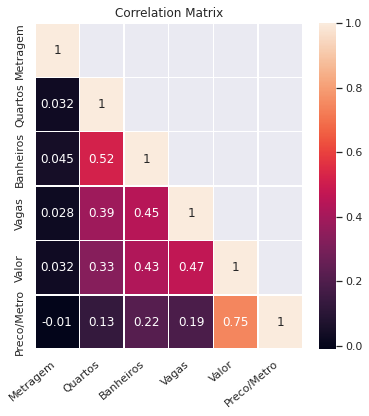

In [ ]:
corr_matrix(imoveis_df, 'sequential')

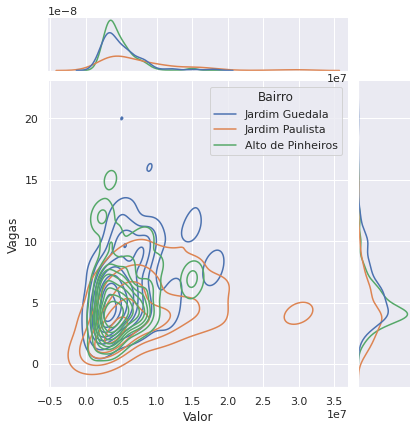

In [ ]:
# top 5 bairros com mais imoveis
top3_bairros = imoveis_df['Bairro'].value_counts().head(3).index
top3_df = imoveis_df[imoveis_df['Bairro'].isin(top3_bairros)]

#sns.lmplot(data=top5_df,x="Valor", y="Metragem", hue="Bairro", height=10)
sns.jointplot(
    data=top3_df,
    x="Valor", y="Vagas", hue="Bairro",
    kind="kde",
)

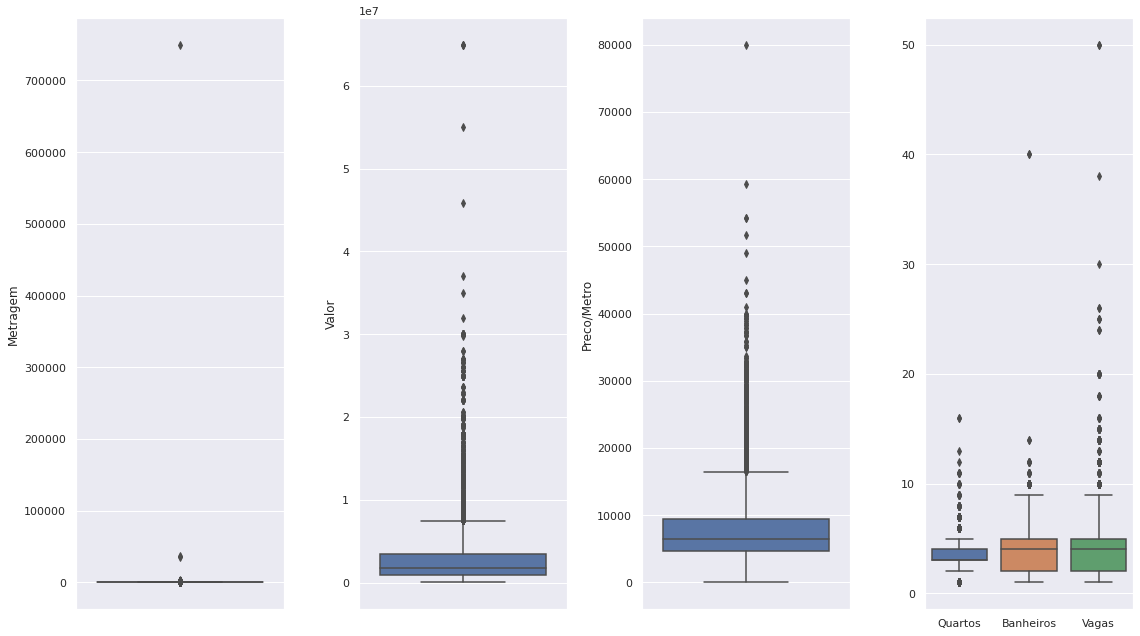

array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
        500000.,  600000.,  700000.,  800000.])

In [ ]:
# Pesquisar um visualização para analisar os quartis, mediana e outliers
# --- boxplot COM ouliers ---
fig, ax = plt.subplots(1,4, figsize=(16,9))

sns.boxplot(data=imoveis_df, y='Metragem', ax=ax[0])

sns.boxplot(data=imoveis_df, y='Valor', ax=ax[1])

sns.boxplot(data=imoveis_df, y='Preco/Metro', ax=ax[2])

colunas = ['Quartos','Banheiros','Vagas']
sns.boxplot(data=imoveis_df[colunas], ax=ax[3])

fig.tight_layout()
plt.show()
ax[0].get_yticks()

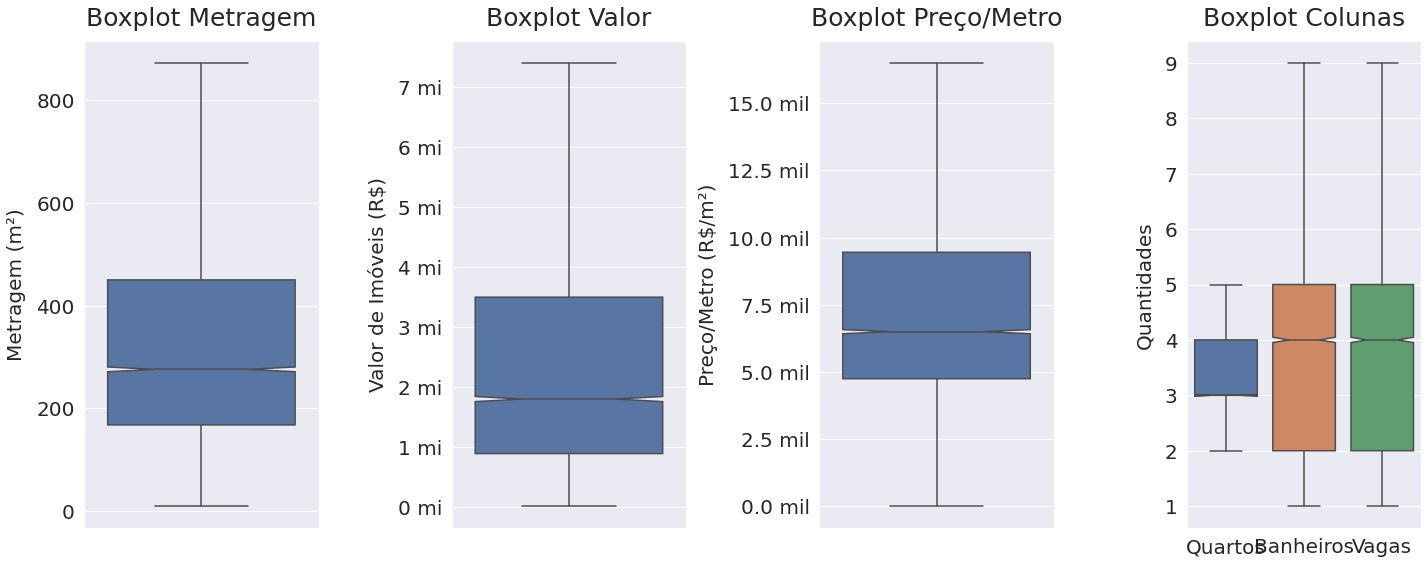

In [ ]:
# --- boxplot SEM ouliers ---

fig, ax = plt.subplots(1,4, figsize=(20,8))
# Boxplot Metragem
sns.boxplot(data=imoveis_df, y='Metragem', showfliers=False, notch=True, ax=ax[0])
ax[0].set_title('Boxplot Metragem', fontsize=25, pad=15)
ax[0].tick_params(axis='both', which='major', labelsize=20)
ax[0].set_ylabel('Metragem (m²)', fontsize=20, labelpad=10)

# Boxplot Valor
sns.boxplot(data=imoveis_df, y='Valor', showfliers=False, notch=True, ax=ax[1])
ax[1].set_title('Boxplot Valor', fontsize=25, pad=15)
ax[1].tick_params(axis='both', which='major', labelsize=20)
ax[1].set_ylabel('Valor de Imóveis (R$)', fontsize=20, labelpad=10)
# Escala de milhão em R$
y_labels = ax[1].get_yticks()
ax[1].set_yticklabels(['{:.0f} mi'.format(y/(10**6)) for y in y_labels])

# Boxplot Preco/Metro
sns.boxplot(data=imoveis_df, y='Preco/Metro', showfliers=False, notch=True, ax=ax[2])
ax[2].set_title('Boxplot Preço/Metro', fontsize=25, pad=15)
ax[2].tick_params(axis='both', which='major', labelsize=20)
ax[2].set_ylabel('Preço/Metro (R$/m²)', fontsize=20, labelpad=10)
# Escala de milhar em m²
y_labels = ax[2].get_yticks()
ax[2].set_yticklabels(['{:.1f} mil'.format(y/1000) for y in y_labels])

# Boxplots Quartos, Banheiro e Vagas
colunas = ['Quartos','Banheiros','Vagas']
sns.boxplot(data=imoveis_df[colunas], showfliers=False, notch=True, ax=ax[3])
ax[3].set_title('Boxplot Colunas', fontsize=25, pad=15)
ax[3].tick_params(axis='both', which='major', labelsize=20)
ax[3].set_ylabel('Quantidades', fontsize=20, labelpad=10)

# Ajusta figura aos padings
fig.tight_layout()
plt.show()

## **Em progresso**

In [ ]:
def missing_values(dataset):
    """
    It reads a dataframe and check Missing Values.

    Parameters
    ------
    dataset: dataframe
        Table with dataset to be checked.
        
    Returns
    ------
    MissingSummary: dataframe
        Table with missing values statistics.

    Examples
    ------
    nulls_data = missing_values(dataset)
    """

    categories = []
    null_list = []
    null_percent = []

    for column in dataset:
        categories.append(column)
        null_list.append(dataset[column].isnull().sum())
        null_percent.append(round( (null_list[-1] / dataset.shape[0]) *100, 3))

    nulls_data = pd.DataFrame({'Field Name': categories, 
                                'Total Missing Values': null_list, 
                                'Missing Percentage': null_percent})
    print('Dataset shape:')
    print(f'{dataset.shape[0]} rows X {dataset.shape[1]} columns')

    return nulls_data

In [ ]:
missing_values(imoveis_df)

Dataset shape:
10008 rows X 9 columns


,Field Name,Total Missing Values,Missing Percentage
0,Rua,3434,34.31
1,Bairro,12,0.12
2,Cidade,0,0.00
3,Metragem,0,0.00
4,Quartos,0,0.00
5,Banheiros,0,0.00
6,Vagas,0,0.00
7,Valor,0,0.00
8,Tipo_anuncio,9156,91.49


In [ ]:
imoveis_df[imoveis_df.duplicated()]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Tipo_anuncio
1364,Avenida Antônio Batuira,Alto de Pinheiros,São Paulo,466,4,6,6,2650000.00,None
1365,Rua Alberto Faria,Alto de Pinheiros,São Paulo,290,4,3,4,3500000.00,None
1366,NaN,Morumbi,São Paulo,655,3,3,5,3995000.00,None
1367,Rua Antônio de Gouveia Giudice,Alto de Pinheiros,São Paulo,505,4,5,5,28000.00,/Mês
1368,Rua Natingui,Vila Madalena,São Paulo,285,4,4,6,2000000.00,None
...,...,...,...,...,...,...,...,...,...
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,665000.00,None
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,2300000.00,None
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,1050000.00,None
10006,"Rua Manuel Onha, , 514",Vila Oratório,São Paulo,185,3,2,2,2200.00,/Mês


In [ ]:
help(missing_values)

Help on function missing_values in module __main__:

missing_values(dataset)
    It reads a dataframe and check Missing Values.
    
    Parameters
    ------
    dataset: dataframe
        Table with dataset to be checked.
        
    Returns
    ------
    MissingSummary: dataframe
        Table with missing values statistics.
    
    Examples
    ------
    nulls_data = missing_values(dataset)

